In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.metrics

tech_supp_df = pd.read_csv(r"D:\Machine Learning\Machine Learning Projects\K-Means clustering (To improve the CSAT rating)\technical_support_data-1.csv")
tech_supp_df.dtypes #for clustering all the dimensions are to be numerical


PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [12]:
# for looking the data 
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [13]:
#converting all the columns into a corresponding Z-score values using zscore function

from scipy.stats import zscore

#since zscore not works on the non numerical column,drop it
numeric_cols=tech_supp_df.drop('PROBLEM_TYPE',axis=1)#axis=1-> for dropping a column

prob_type=tech_supp_df.pop("PROBLEM_TYPE")#.pop ->it deletes the column from the data frame

#Applying zcore on numeric_cols
numeric_cols=numeric_cols.apply(zscore)

#re-combining the numeric_cols with the prob_type(label)
tech_supp_df=numeric_cols.join(prob_type)
tech_supp_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


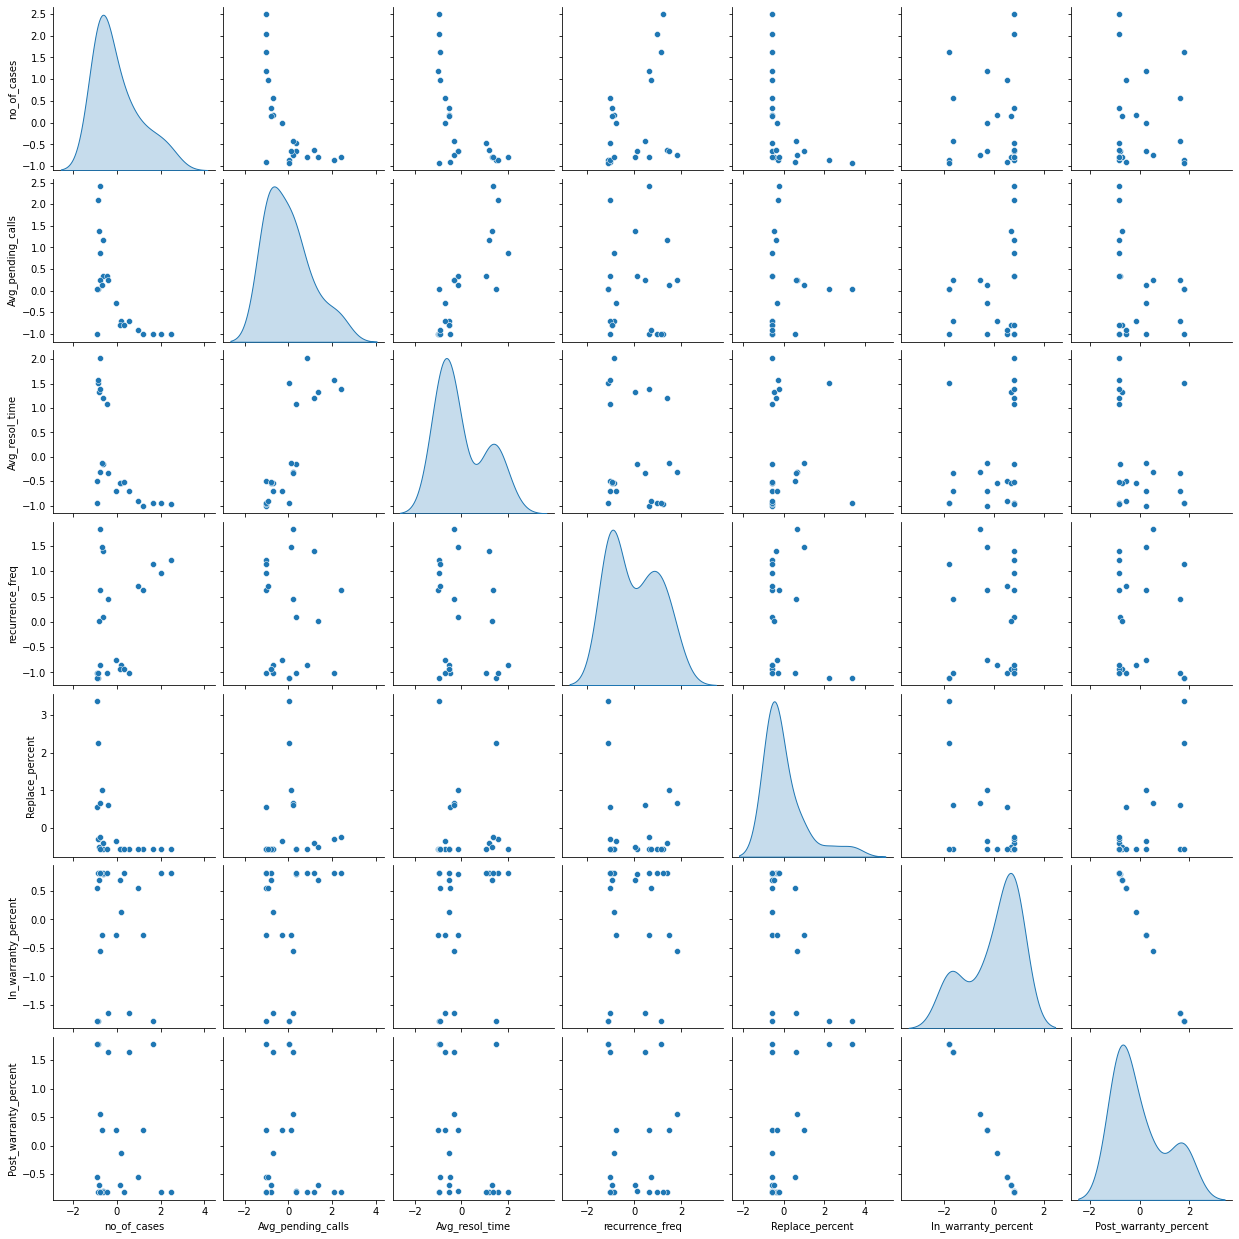

In [14]:
import seaborn as sns
sns.pairplot(numeric_cols,diag_kind='kde')#'kde'-> for density curve

In [15]:
#By visual analysing we could expect a number of cluster(k) from 3 to 6

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'selecting k with Elbow Method')

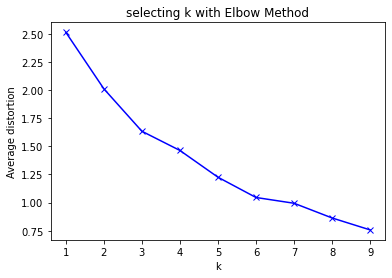

In [16]:
#ELBOW METHOD
#lets see how many 'k' values we get from the Elbow method

tech_supp_attributes= tech_supp_df.drop("PROBLEM_TYPE",axis=1)

#Finding optimal no.of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)#asking algorithm to try out k=1,2...10
meanDistortions=[]#capturing sum of squared errors in an array

#For Next loop
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    
    prediction=model.predict(tech_supp_attributes)
    meanDistortions.append(sum(np.min(cdist(tech_supp_attributes,model.cluster_centers_, 'euclidean'), axis=1)) / tech_supp_attributes.shape[0])
    
    
#plot statement
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('selecting k with Elbow Method')


In [17]:
#since most of the dimension showed 2 clusters(k=2)
#let us first start with k=2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)# at this point,the random 2 clusters generated,centroids are found and distance between the clusters & the data points are calculated
prediction=final_model.predict(tech_supp_attributes)#here,every record in the data set will get associated with one of the centroids & the centroids label will be captured along with every record.

#Append the prediction
tech_supp_df["GROUP"]= prediction#adding a new column [GROUP] to original data frame and sending the information from the prediction array to it.
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE","GROUP"]]#printing only the two columns


Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,1
1,power chord does not tightly fit,1
2,Fan swing not working,1
3,Main switch does not on,1
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,0


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

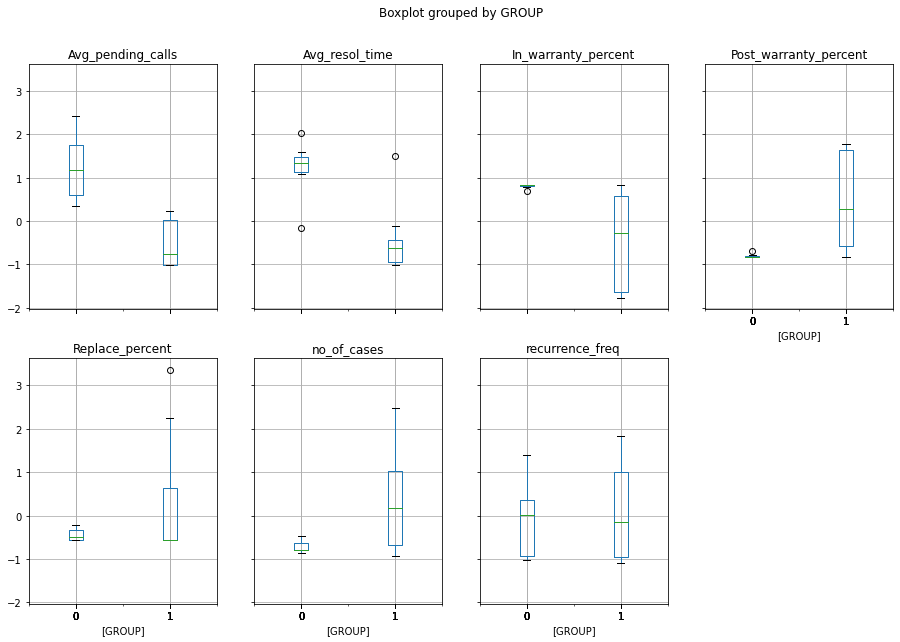

In [18]:
#To extract some useful information out of the distribution of the data among the 2 groups (k=2)
#using boxplot -> one of the most informative visual tool
tech_supp_df.boxplot(by='GROUP', layout=(2,4), figsize=(15,10)) #(by=-> do it group wise->there a 2 groups,so every column....
                                                                #...there will be 2 box plots,one for group 0 & one for group 1

In [19]:
# The K = 2 boxplot clearly shows outliers in group 1. Indicating that the group 1 is stretched...
#... indicating probability of another cluster.since outliers can make the clusters completely meaningless.
#Let us try with K = 3, the next elbow point

In [21]:
# let us  start with k=3
final_model=KMeans(3)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction
tech_supp_df['GROUP']=prediction
print("Group Assigned: \n")
tech_supp_df[["PROBLEM_TYPE","GROUP"]]


Group Assigned: 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,1
2,Fan swing not working,0
3,Main switch does not on,1
4,Forgot mobile app password,2
5,AC stops abruptly,2
6,App hangs while entring commands,2
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,2


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

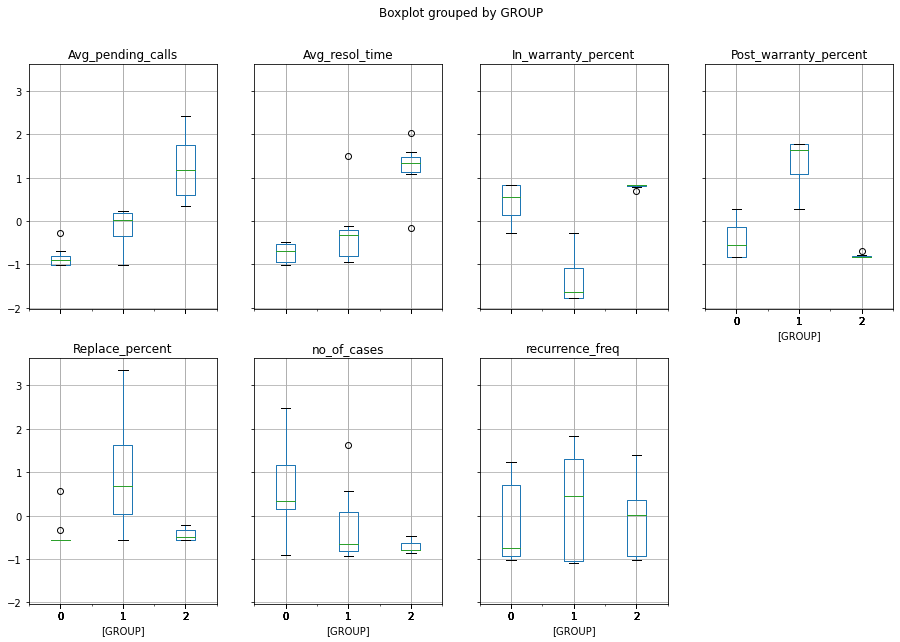

In [22]:
#using boxplot
tech_supp_df.boxplot(by='GROUP', layout=(2,4), figsize=(15,10))